# EDA informacion de Taxis Trips
 En este Notebook realizaremos el proceso de analisis de dataset donde encontramos la informacion de los viajes que se realizan en los taxis.

#### Presentamos primeramente un diccionario de las variables que se encuantran en el dataset a examinar


| Nombre del Campo         | Descripción                                                                                                                                                                  |
|--------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| VendorID                 | Un código que indica el proveedor de TPEP que proporcionó el registro. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.                                                |
| tpep_pickup_datetime     | La fecha y hora en que se activó el taxímetro.                                                                                                                               |
| tpep_dropoff_datetime    | La fecha y hora en que se desactivó el taxímetro.                                                                                                                            |
| Passenger_count          | El número de pasajeros en el vehículo. Este es un valor ingresado por el conductor.                                                                                           |
| Trip_distance            | La distancia del viaje en millas reportada por el taxímetro.                                                                                                                 |
| PULocationID             | Zona de Taxi de TLC en la que se activó el taxímetro.                                                                                                                         |
| DOLocationID             | Zona de Taxi de TLC en la que se desactivó el taxímetro.                                                                                                                     |
| RateCodeID               | El código de tarifa final en vigor al final del viaje. 1= Tarifa estándar; 2= JFK; 3= Newark; 4= Nassau o Westchester; 5= Tarifa negociada; 6= Viaje en grupo.                |
| Store_and_fwd_flag       | Esta bandera indica si el registro del viaje se guardó en la memoria del vehículo antes de enviarlo al proveedor, también conocido como “almacenar y reenviar.” Y= viaje almacenado y reenviado; N= viaje no almacenado y reenviado. |
| Payment_type             | Un código numérico que indica cómo pagó el pasajero el viaje. 1= Tarjeta de crédito; 2= Efectivo; 3= Sin cargo; 4= Disputa; 5= Desconocido; 6= Viaje anulado.                 |
| Fare_amount              | La tarifa calculada por tiempo y distancia según el taxímetro.                                                                                                               |
| Extra                    | Extras y recargos misceláneos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por hora pico y nocturno.                                                             |
| MTA_tax                  | Impuesto MTA de $0.50 que se activa automáticamente según la tarifa medida en uso.                                                                                           |
| Improvement_surcharge    | Recargo de mejora de $0.30 evaluado en viajes a la llamada. El recargo de mejora comenzó a cobrarse en 2015.                                                                |
| Tip_amount               | Importe de la propina – Este campo se rellena automáticamente para las propinas con tarjeta de crédito. No se incluyen las propinas en efectivo.                             |
| Tolls_amount             | Importe total de todos los peajes pagados en el viaje.                                                                                                                       |
| Total_amount             | Importe total cobrado a los pasajeros. No incluye las propinas en efectivo.                                                                                                  |
| Congestion_Surcharge     | Importe total recaudado en el viaje por el recargo de congestión del Estado de Nueva York.                                                                                   |
| Airport_fee              | $1.25 por recogida únicamente en los aeropuertos de LaGuardia y John F. Kennedy.                                                                                             |


In [33]:
# Importamos las librerias necesarias para el analisis de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignorar todos los warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
taxis= pd.read_parquet('../Datasets/yellow_tripdata_2023-07.parquet')

# El siguiente comando es para en caso de que se desee cargar un numero especifico de datos 
'''# Seleccionar una muestra de n filas
sample_size = 200000

if len(taxis) > sample_size:
    taxis = taxis.sample(n=sample_size)'''


'# Seleccionar una muestra de n filas\nsample_size = 200000\n\nif len(taxis) > sample_size:\n    taxis = taxis.sample(n=sample_size)'

In [35]:
print('Tamaño del DataFrame','\n')
print(taxis.shape)
print('------------------------------')
print('Informacion del DataFrame','\n')
print(taxis.info())

Tamaño del DataFrame 

(2907108, 19)
------------------------------
Informacion del DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907108 entries, 0 to 2907107
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount

In [36]:
for column in taxis.columns:
    print(f'la columna {column} tiene {taxis[column].isnull().sum()} de valores nulos')

la columna VendorID tiene 0 de valores nulos
la columna tpep_pickup_datetime tiene 0 de valores nulos
la columna tpep_dropoff_datetime tiene 0 de valores nulos
la columna passenger_count tiene 85086 de valores nulos
la columna trip_distance tiene 0 de valores nulos
la columna RatecodeID tiene 85086 de valores nulos
la columna store_and_fwd_flag tiene 85086 de valores nulos
la columna PULocationID tiene 0 de valores nulos
la columna DOLocationID tiene 0 de valores nulos
la columna payment_type tiene 0 de valores nulos
la columna fare_amount tiene 0 de valores nulos
la columna extra tiene 0 de valores nulos
la columna mta_tax tiene 0 de valores nulos
la columna tip_amount tiene 0 de valores nulos
la columna tolls_amount tiene 0 de valores nulos
la columna improvement_surcharge tiene 0 de valores nulos
la columna total_amount tiene 0 de valores nulos
la columna congestion_surcharge tiene 85086 de valores nulos
la columna Airport_fee tiene 85086 de valores nulos


#### Como la finalidad de este DataFrame es sacar los datos de un modelo de ML que nos prediga el valor del viaje en taxi seleccionaremos y analizaremos varibles que segun su definicion consideremos que son fundamentales para el analisis.

In [37]:
# Basandonos en sus definiciones dentro del DataFrame seleccionamos las siguientes columnas 

columnas= ['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','PULocationID','payment_type','fare_amount']

# Y con estas variables haremos el analisis del los datos

datos= taxis[columnas]

In [38]:
# Asi quedan nuestros datos para el analisis
datos.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,payment_type,fare_amount
0,1,2023-07-01 00:29:59,2023-07-01 00:40:15,1.0,1.80,140,1,12.1
1,2,2023-07-01 00:03:25,2023-07-01 00:23:44,1.0,2.31,163,2,19.1
2,2,2023-07-01 00:38:29,2023-07-01 00:48:53,1.0,2.36,142,1,13.5
3,2,2023-07-01 00:14:16,2023-07-01 00:29:13,1.0,4.36,68,1,19.8
4,1,2023-07-01 00:11:15,2023-07-01 00:20:47,0.0,1.60,161,1,11.4


In [39]:

# Con la variable 'tpep_pickup_datetime' la usamos para obtener el dia y mes en que se realiza el viaje 
datos['pickup_month'] = datos['tpep_pickup_datetime'].dt.month_name()
datos['pickup_day_of_week'] = datos['tpep_pickup_datetime'].dt.day_of_week

# Y con las variables 'tpep_dropoff_datetime' y 'tpep_pickup_datetime' las usamos para obtener la duracion del viaje en minutos 
datos['trip_duration_minutes'] = round((datos['tpep_dropoff_datetime'] - datos['tpep_pickup_datetime']).dt.total_seconds() / 60, 1)

# Una vez obtenidas esa informacion que es más cuantificable borramos las columnas usadas 

datos.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis= 1, inplace=True)

In [40]:
# Este es el resultado
datos.head(5)

,VendorID,passenger_count,trip_distance,PULocationID,payment_type,fare_amount,pickup_month,pickup_day_of_week,trip_duration_minutes
0,1,1.0,1.80,140,1,12.1,July,5,10.3
1,2,1.0,2.31,163,2,19.1,July,5,20.3
2,2,1.0,2.36,142,1,13.5,July,5,10.4
3,2,1.0,4.36,68,1,19.8,July,5,15.0
4,1,0.0,1.60,161,1,11.4,July,5,9.5


In [41]:
# Usamos un diccionarionario para mapear los nombres de los dia de la semana
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
datos['pickup_day_of_week'] = datos['pickup_day_of_week'].replace(day_mapping)

In [42]:
# Ahora procedemos a usar un DataFrame que nos ayudara a identificar los valores de 'PULocationID' y 'DOLocationID'

taxis_zone= pd.read_csv('C:/Users/HP/Downloads/taxi_zones.csv', sep=';')
taxis_zone

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,"0,11635745319","0,00078230679",Newark Airport,1,EWR
1,2,"0,43346966679","0,00486634038",Jamaica Bay,2,Queens
2,3,"0,08434110590","0,00031441416",Allerton/Pelham Gardens,3,Bronx
3,4,"0,04356652709","0,00011187195",Alphabet City,4,Manhattan
4,5,"0,09214648986","0,00049795749",Arden Heights,5,Staten Island
...,...,...,...,...,...,...
258,259,"0,12675030519","0,00039455249",Woodlawn/Wakefield,259,Bronx
259,260,"0,13351415464","0,00042234533",Woodside,260,Queens
260,261,"0,02712045636","0,00003434232",World Trade Center,261,Manhattan
261,262,"0,04906362315","0,00012233027",Yorkville East,262,Manhattan


##### Para usar estos datos lo que haremos sera, usar la colunma de 'OBJECTID' para hacer un join y tener cada viaje con su zona 

In [43]:
# Aqui haces un merge para unir las tablas y nos quede el nombre de las zonas 
datos= pd.merge(datos, taxis_zone, left_on='PULocationID', right_on='OBJECTID', how='left')

In [44]:
# Mostramos el resultado 
datos.head()

,VendorID,passenger_count,trip_distance,PULocationID,payment_type,fare_amount,pickup_month,pickup_day_of_week,trip_duration_minutes,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,1.0,1.80,140,1,12.1,July,Saturday,10.3,140.0,"0,04758429113","0,00011420391",Lenox Hill East,140.0,Manhattan
1,2,1.0,2.31,163,2,19.1,July,Saturday,20.3,163.0,"0,03417686698","0,00004085678",Midtown North,163.0,Manhattan
2,2,1.0,2.36,142,1,13.5,July,Saturday,10.4,142.0,"0,03817589423","0,00007565379",Lincoln Square East,142.0,Manhattan
3,2,1.0,4.36,68,1,19.8,July,Saturday,15.0,68.0,"0,04933737956","0,00011107338",East Chelsea,68.0,Manhattan
4,1,0.0,1.60,161,1,11.4,July,Saturday,9.5,161.0,"0,03580391006","0,00007191307",Midtown Center,161.0,Manhattan


In [45]:
# Ahora nos quedamos con las columnas que vamos a usar 
datos.drop(['OBJECTID','Shape_Leng','Shape_Area','LocationID'], axis= 1, inplace=True)

In [46]:
# Mostramos los resultados 
datos.head()

,VendorID,passenger_count,trip_distance,PULocationID,payment_type,fare_amount,pickup_month,pickup_day_of_week,trip_duration_minutes,zone,borough
0,1,1.0,1.80,140,1,12.1,July,Saturday,10.3,Lenox Hill East,Manhattan
1,2,1.0,2.31,163,2,19.1,July,Saturday,20.3,Midtown North,Manhattan
2,2,1.0,2.36,142,1,13.5,July,Saturday,10.4,Lincoln Square East,Manhattan
3,2,1.0,4.36,68,1,19.8,July,Saturday,15.0,East Chelsea,Manhattan
4,1,0.0,1.60,161,1,11.4,July,Saturday,9.5,Midtown Center,Manhattan


In [47]:
# Hacemos el conteo de los nulos 
for column in datos.columns:
    print(f'la columna {column} tiene {datos[column].isnull().sum()} de valores nulos')

la columna VendorID tiene 0 de valores nulos
la columna passenger_count tiene 85086 de valores nulos
la columna trip_distance tiene 0 de valores nulos
la columna PULocationID tiene 0 de valores nulos
la columna payment_type tiene 0 de valores nulos
la columna fare_amount tiene 0 de valores nulos
la columna pickup_month tiene 0 de valores nulos
la columna pickup_day_of_week tiene 0 de valores nulos
la columna trip_duration_minutes tiene 0 de valores nulos
la columna zone tiene 31111 de valores nulos
la columna borough tiene 31111 de valores nulos


In [48]:
# Vemos que ciertas columnas tienen valores nulos, pero como vemos no representan una gran cantidad de los datos
# Por lo que procedemos a eliminarlas

datos.dropna(inplace=True)

In [49]:
# Ahora  las variables 'payment_type' y 'VendorID' les asginamos sus respectivas categorias 

VendorID= {1:'Creative Mobile Technologies, LLC',
        2:'VeriFone Inc'}

payment_type= {1:'Credit card',2:'Cash',3:'No charge',
        4:'Dispute', 5:'Unknown', 6:'Trip cancelled'}

datos['VendorID']= datos['VendorID'].replace(VendorID)
datos['payment_type']= datos['payment_type'].replace(payment_type)



#### Una vez listo los datos preparamos las visulizaciones y analisis.

In [50]:
datos.head()

,VendorID,passenger_count,trip_distance,PULocationID,payment_type,fare_amount,pickup_month,pickup_day_of_week,trip_duration_minutes,zone,borough
0,"Creative Mobile Technologies, LLC",1.0,1.80,140,Credit card,12.1,July,Saturday,10.3,Lenox Hill East,Manhattan
1,VeriFone Inc,1.0,2.31,163,Cash,19.1,July,Saturday,20.3,Midtown North,Manhattan
2,VeriFone Inc,1.0,2.36,142,Credit card,13.5,July,Saturday,10.4,Lincoln Square East,Manhattan
3,VeriFone Inc,1.0,4.36,68,Credit card,19.8,July,Saturday,15.0,East Chelsea,Manhattan
4,"Creative Mobile Technologies, LLC",0.0,1.60,161,Credit card,11.4,July,Saturday,9.5,Midtown Center,Manhattan


In [51]:
# Primero pasamos a ver las estadisticas desriptivas de las variables numericas 
datos.describe()

,passenger_count,trip_distance,PULocationID,fare_amount,trip_duration_minutes
count,2.791733e+06,2.791733e+06,2.791733e+06,2.791733e+06,2.791733e+06
mean,1.401925e+00,3.807167e+00,1.622824e+02,1.954832e+01,1.702086e+01
std,9.216759e-01,7.447152e+01,6.287299e+01,1.962448e+01,4.151084e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,-6.029000e+02,-5.710000e+01
25%,1.000000e+00,1.060000e+00,1.320000e+02,9.300000e+00,7.400000e+00
50%,1.000000e+00,1.800000e+00,1.610000e+02,1.350000e+01,1.230000e+01
75%,1.000000e+00,3.500000e+00,2.310000e+02,2.190000e+01,2.020000e+01
max,9.000000e+00,7.467430e+04,2.630000e+02,1.040400e+03,7.348800e+03


#### Como vemos en las estadisticas hay datos muy extremos, como el minimo de fare_amount es de -602 o en trip_duration_minutes el minimo es -57 min, esto puede alterar algunas estadisticas por lo que le vamos a eliminar las observaciones que sean menores a 0 y aplicar la regla empirica a los datos.

In [52]:
# Borramos los datos negativos 
datos= datos[(datos['fare_amount']>=1) & (datos['trip_duration_minutes']>=1) & (datos['passenger_count']>=1) & (datos['trip_distance']>=1)]
datos.describe()

,passenger_count,trip_distance,PULocationID,fare_amount,trip_duration_minutes
count,2.126983e+06,2.126983e+06,2.126983e+06,2.126983e+06,2.126983e+06
mean,1.435752e+00,4.698819e+00,1.606153e+02,2.316566e+01,1.992177e+01
std,9.206596e-01,8.477326e+01,6.252124e+01,1.974236e+01,4.321020e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.510000e+00,1.320000e+02,1.140000e+01,1.000000e+01
50%,1.000000e+00,2.300000e+00,1.610000e+02,1.560000e+01,1.490000e+01
75%,2.000000e+00,4.590000e+00,2.300000e+02,2.610000e+01,2.300000e+01
max,9.000000e+00,7.467430e+04,2.630000e+02,1.040400e+03,6.636400e+03


In [53]:
# Aplicamos la regla empirica a las varaibles numericas mediante un for
columns=['passenger_count','trip_distance','fare_amount','trip_duration_minutes']
for column in columns:
    media= datos[column].mean()
    desviacion= datos[column].std()

    limite_inferior= media - 2 * desviacion
    limite_superior= media + 2 * desviacion

    datos= datos[(datos[column]>=limite_inferior) & (datos[column]<=limite_superior)]



In [54]:
# Una vez aplicada la regla empirica veremos elos cambios en las estadisticas 
datos.describe()

,passenger_count,trip_distance,PULocationID,fare_amount,trip_duration_minutes
count,1.868072e+06,1.868072e+06,1.868072e+06,1.868072e+06,1.868072e+06
mean,1.253961e+00,3.246510e+00,1.624777e+02,1.876810e+01,1.622629e+01
std,5.295001e-01,2.805083e+00,6.373584e+01,1.096411e+01,9.108721e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.480000e+00,1.320000e+02,1.140000e+01,9.600000e+00
50%,1.000000e+00,2.160000e+00,1.610000e+02,1.490000e+01,1.400000e+01
75%,1.000000e+00,3.670000e+00,2.310000e+02,2.260000e+01,2.050000e+01
max,3.000000e+00,4.623000e+01,2.630000e+02,6.200000e+01,9.880000e+01


In [55]:
# Se muestra el DataFrame
datos

,VendorID,passenger_count,trip_distance,PULocationID,payment_type,fare_amount,pickup_month,pickup_day_of_week,trip_duration_minutes,zone,borough
0,"Creative Mobile Technologies, LLC",1.0,1.80,140,Credit card,12.1,July,Saturday,10.3,Lenox Hill East,Manhattan
1,VeriFone Inc,1.0,2.31,163,Cash,19.1,July,Saturday,20.3,Midtown North,Manhattan
2,VeriFone Inc,1.0,2.36,142,Credit card,13.5,July,Saturday,10.4,Lincoln Square East,Manhattan
3,VeriFone Inc,1.0,4.36,68,Credit card,19.8,July,Saturday,15.0,East Chelsea,Manhattan
5,VeriFone Inc,1.0,8.67,138,Credit card,38.7,July,Saturday,24.7,LaGuardia Airport,Queens
...,...,...,...,...,...,...,...,...,...,...,...
2822016,"Creative Mobile Technologies, LLC",1.0,3.20,142,Credit card,17.0,July,Monday,14.3,Lincoln Square East,Manhattan
2822017,"Creative Mobile Technologies, LLC",3.0,2.70,234,Cash,14.9,July,Monday,12.8,Union Sq,Manhattan
2822018,"Creative Mobile Technologies, LLC",1.0,10.50,50,Cash,43.6,July,Monday,27.9,Clinton West,Manhattan
2822019,VeriFone Inc,1.0,3.62,48,Credit card,19.8,July,Monday,16.2,Clinton East,Manhattan


#### Ahora Crearemos unos elemetos visuales para mejorar la interpretacion 

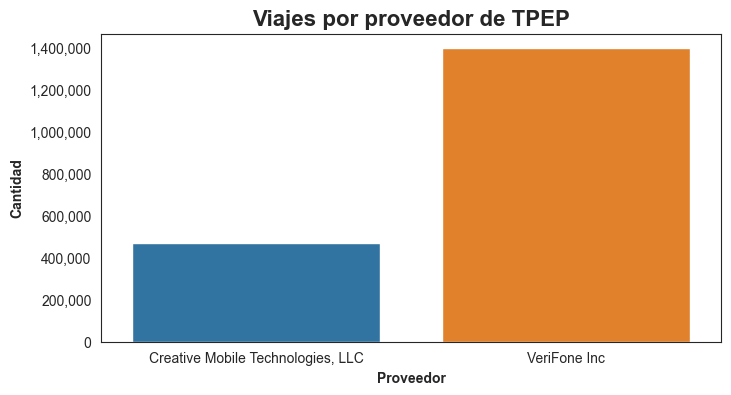

In [56]:
# Definimos el estilo
sns.set_style('white')

# Definimos el tamaño de la figura 
plt.figure(figsize=(8,4))

# Definimos el grafico y los datos a usar 
ax = sns.countplot(data=datos, x='VendorID', hue='VendorID')

# Colocamos las etiquetas 
plt.title('Viajes por proveedor de TPEP',fontweight='bold', fontsize=16)
plt.xlabel('Proveedor',fontweight='bold')
plt.ylabel('Cantidad',fontweight='bold')

# Seteamos el eje de las y para mostras los valores en su forma completa 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Mostramos el grafico
plt.show()

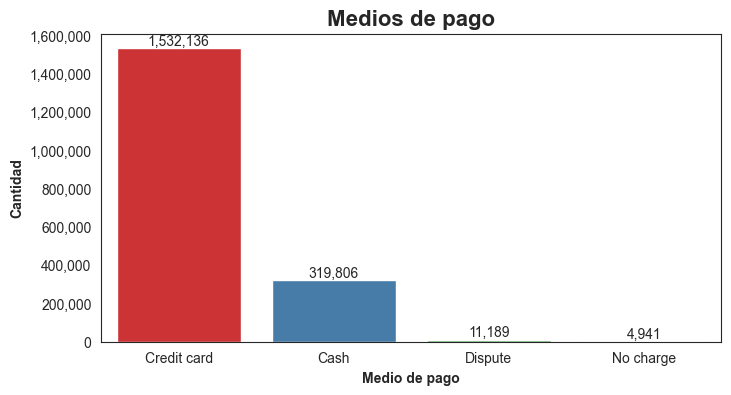

In [57]:
# Definimos el estilo 
sns.set_style('white')

# Definimos el tamaño 
plt.figure(figsize=(8,4))

# Definimos el grafico y los datos a usar 
ax = sns.countplot(data=datos, x='payment_type', hue='payment_type', palette='Set1')

# Colocamos las etiquetas 
plt.title('Medios de pago',fontweight='bold', fontsize=16)
plt.xlabel('Medio de pago',fontweight='bold')
plt.ylabel('Cantidad',fontweight='bold')

# Seteamos el eje de las y para mostras los valores en su forma completa
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Usamos un for para crear las etiquetas que muestras las observaciones por barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostramos el grafico 
plt.show()

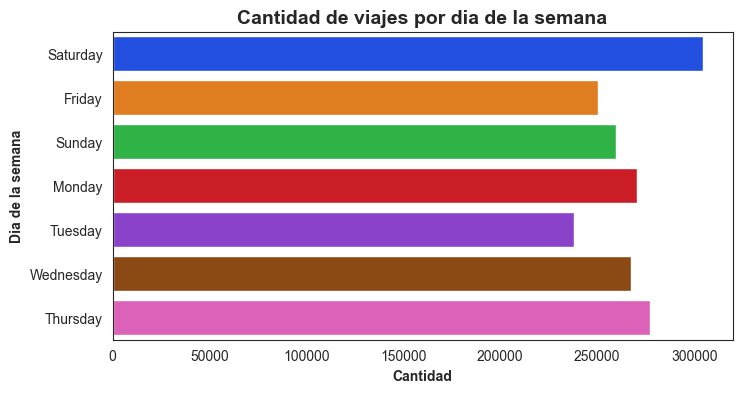

In [58]:
# Definimos el estilo 
sns.set_style('white')

# Definimos el tamaño 
plt.figure(figsize=(8,4))

# Definimos el grafico y los datos a usar 
ax = sns.countplot(data=datos, y='pickup_day_of_week', palette='bright',hue='pickup_day_of_week')

# Colocamos las etiquetas 
plt.title('Cantidad de viajes por dia de la semana',fontweight='bold', fontsize=14)
plt.xlabel('Cantidad',fontweight='bold')
plt.ylabel('Dia de la semana',fontweight='bold')

# Mostramos el grafico 
plt.show()

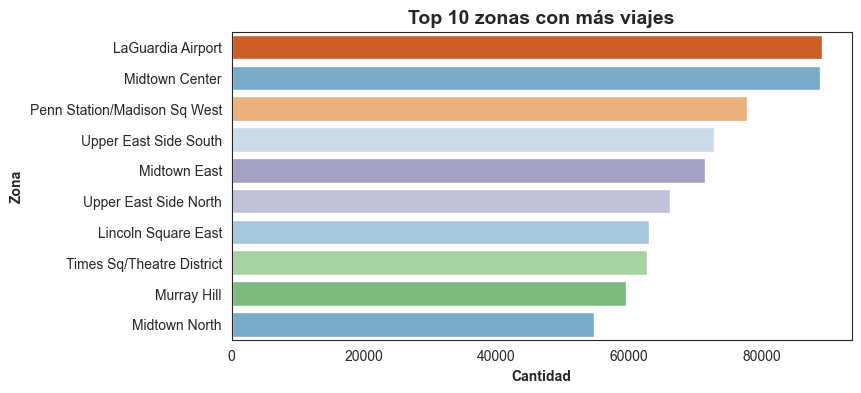

In [59]:
# Definimos el estilo 
sns.set_style('white')

# Creamo un orden para las barras
orden= datos['zone'].value_counts().index[:10]

# Definimos el tamaño 
plt.figure(figsize=(8,4))

# Definimos el grafico y los datos a usar 
ax = sns.countplot(data=datos, y='zone', hue='zone',palette="tab20c",order=orden)

# Colocamos las etiquetas 
plt.title('Top 10 zonas con más viajes',fontweight='bold', fontsize=14)
plt.xlabel('Cantidad',fontweight='bold')
plt.ylabel('Zona',fontweight='bold')

# Mostramos el grafico
plt.show()

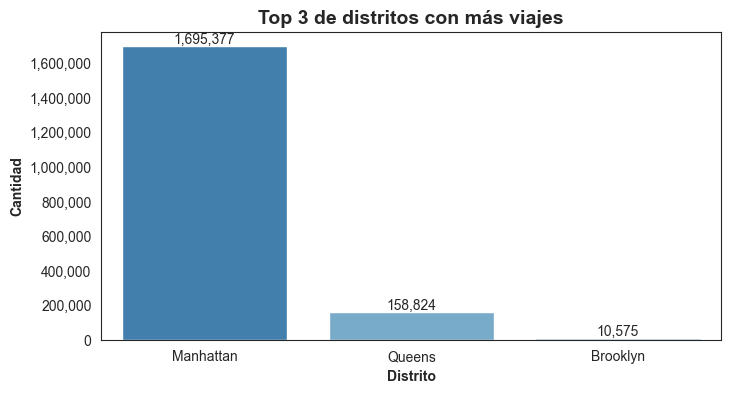

In [60]:
# Definimos el estilo 
sns.set_style('white')

# Definimos el tamaño 
plt.figure(figsize=(8,4))

# Creamo un orden para las barras
orden= datos['borough'].value_counts().index[:3]

# Definimos el grafico y los datos a usar 
ax = sns.countplot(data=datos, x='borough', hue='borough',palette="tab20c", order= orden)

# Colocamos las etiquetas 
plt.title('Top 3 de distritos con más viajes',fontweight='bold', fontsize=14)
plt.xlabel('Distrito',fontweight='bold')
plt.ylabel('Cantidad',fontweight='bold')

# Seteamos el eje de las y para mostras los valores en su forma completa
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Usamos un for para crear las etiquetas que muestras las observaciones por barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostramos el grafico 
plt.show()

#### Ahora analizamos las correlacion entre las variables numericas 

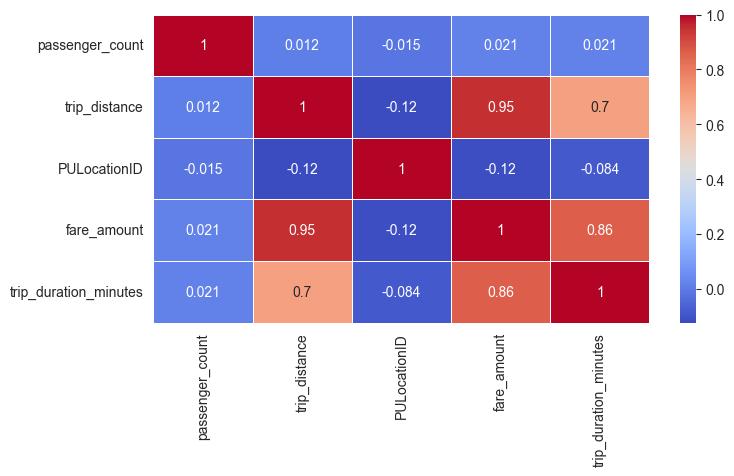

In [61]:
# Definimos el estilo 
sns.set_style('white')

# Definimos el tamaño 
plt.figure(figsize=(8,4))

# Definimos el grafico y los datos a usar 
ax = sns.heatmap(datos.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Mostramos la grafica
plt.show()


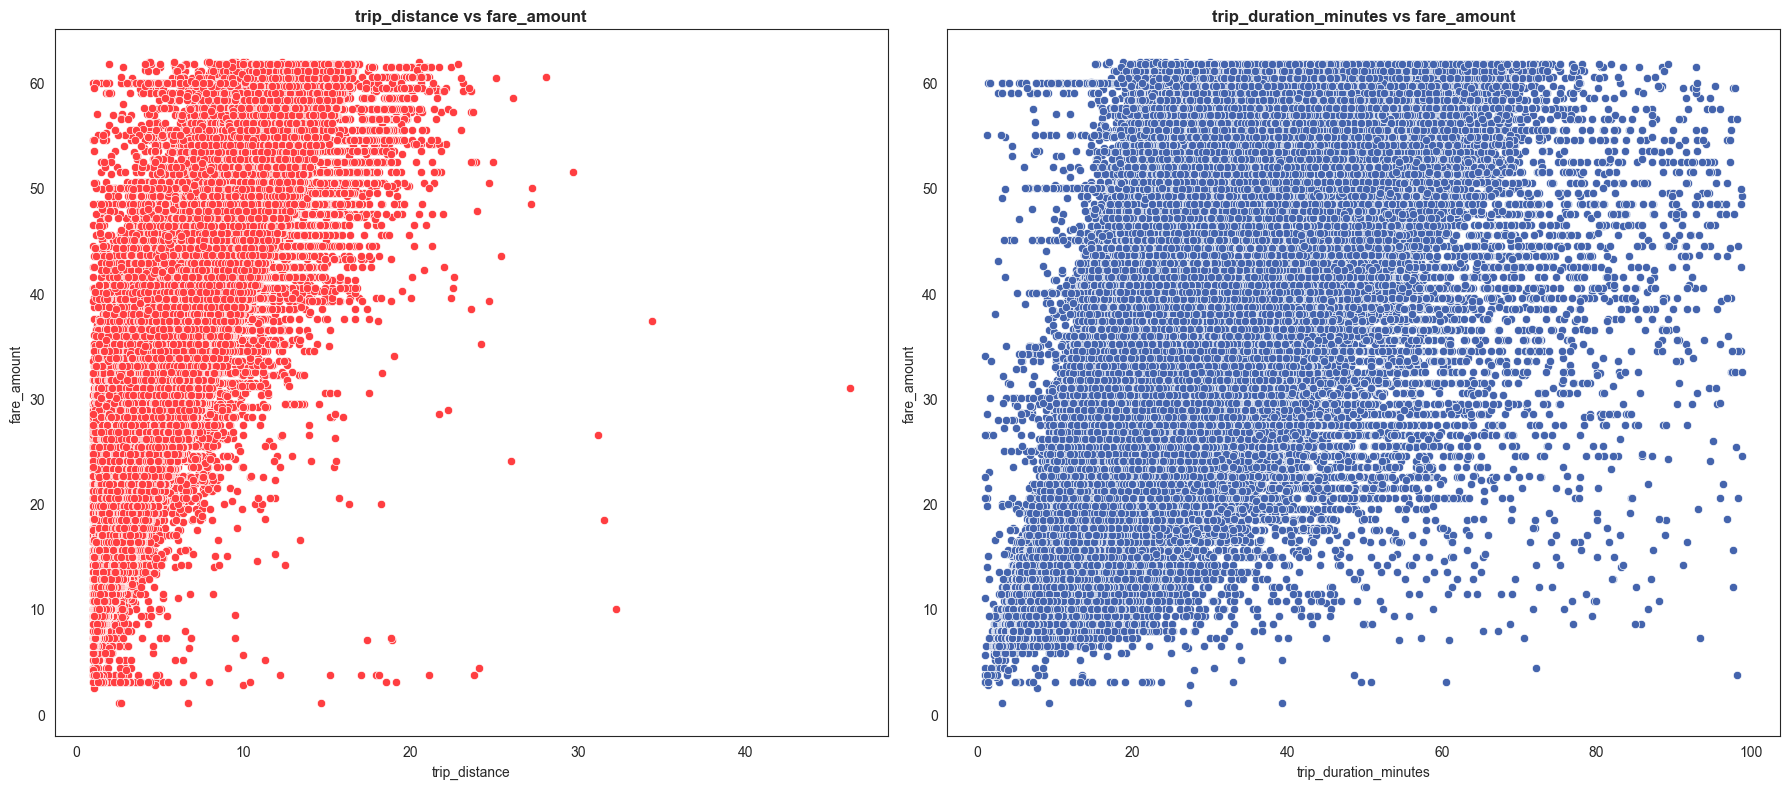

In [62]:
# Definimos las listas de las variables y colores que vamos a usar 
columns = ['trip_distance', 'trip_duration_minutes']
colors = ['#FF3E41', '#4464AD']

# Crear la figura con subplots
plt.figure(figsize=(18, 8))

# Con un for iteramos sobre las listas para crear un gráfico de dispersión por cada variable 
for i, (column, color) in enumerate(zip(columns, colors)):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=datos, x=column, y='fare_amount', color=color)
    plt.title(f'{column} vs fare_amount', fontweight="bold")
    plt.grid(False)

# Ajustar el diseño 
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Con esto damos como finalizado el EDA de nuestros datos de Taxis trip, donde pudimos ver desde distintas perspectivas el comportamiento de nuestros datos, tambien se pudo analizar las correlaciones de las variables con el precio que sera nuestra variable objetivo en el modelo.